# TIOBE Index Ratings Analysis (November 2020)

## **Source:** www.tiobe.com

### **Created by** Doğan Yiğit Yenigün (toUpperCase78)

_The TIOBE Programming Community index is an indicator of the popularity of programming languages. The index is updated once a month. The ratings are based on the number of skilled engineers world-wide, courses and third-party vendors. Popular seach engines such as Google, Bing, Yahoo!, Wikipedia, Amazon, YouTube and Baidu are used to calculate the ratings. It is important to note that the TIOBE index is not about the best programming language or the language in which most line of codes have been written._

_The index can be used to check whether your programming skills are still up to date or make a strategic decision about what programming language should be adopted when starting a new software system._

The text above is the explanation from the website for how the index ratings should be evaluated for the current states of programming languages.

Thanks to carefully crafted dataset that holds all the ratings starting from _June 2001,_ up to the present; my intention is to clearly see the popularity of the languages today and to analyze what lies ahead in the future.

**OK, let's start by importing modules and setting up the data frame:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime
tiobe = pd.read_csv('tiobe_index_ratings_nov2020.csv')

In [2]:
tiobe['DATE'] = tiobe['DATE'].apply(lambda x: datetime.strptime(x, "%b %d, %Y"))
tiobe.set_index('DATE', inplace=True)

Which **programming languages** are available in the corresponding dataset? And, how many ratings have been measured in different days?

In [3]:
print(tiobe.columns)
print("\nRatings from {} languages are available in the dataset.\n".format(len(tiobe.columns)))
print("Individual ratings from up to {} different dates are presented.".format(tiobe.shape[0]))

Index(['C', 'Java', 'Python', 'C++', 'C#', 'Visual Basic', 'JavaScript', 'PHP',
       'R', 'SQL', 'Go', 'Swift', 'Perl', 'Assembly Language', 'Ruby',
       'MATLAB', 'Groovy', 'Rust', 'Objective-C', 'Dart',
       'Classic Visual Basic', 'PL/SQL', 'Delphi/Object Pascal',
       'Transact-SQL'],
      dtype='object')

Ratings from 24 languages are available in the dataset.

Individual ratings from up to 230 different dates are presented.


What are the **first** and **last** days of the evaluations of index ratings

How many **days** have passed between those two dates?

In [4]:
print("FIRST DATE: {}".format(tiobe.index[0]))
print("LAST DATE:  {}".format(tiobe.index[-1]))
diff = tiobe.index[-1] - tiobe.index[0]
print("Total of {} days ({:.2f} years) have passed ...".format(diff.days, diff.days/365))

FIRST DATE: 2001-06-30 00:00:00
LAST DATE:  2020-11-03 00:00:00
Total of 7066 days (19.36 years) have passed ...


### Visualizations of Ratings from All Prog. Languages

The first job is to _visualize the ratings_ of these available programming languages. These should give us clear ideas for how each language progressed throughout the years and compare which ones had more popularities in different times.

First, let's make sure which languages have been measured all the time since the beginning, i.e. **no missing values** have been presented:

In [5]:
check_missing = tiobe.isnull().any()
list(check_missing[check_missing == False].index)

['C',
 'Java',
 'Python',
 'C++',
 'C#',
 'JavaScript',
 'PHP',
 'Perl',
 'Delphi/Object Pascal']

Let's start by putting the **first five programming languages** above in a figure along with their ratings and compare each other:

**Note:** Whenever you check the below and the latter figures against the one in the original web site, these must be roughly the same.

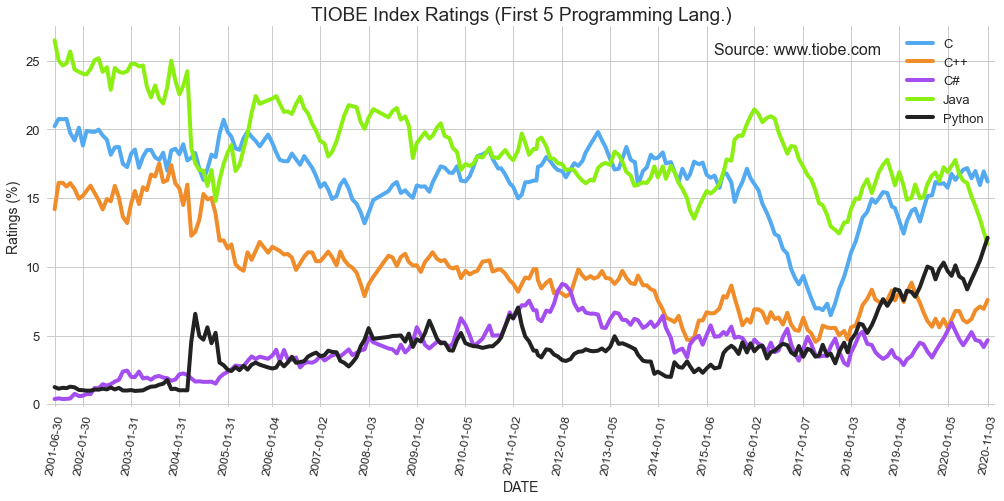

In [6]:
plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = '#ffffff'
def get_years_ind(index):
    ls = []
    for v in index:
        if v.month == 1:  ls.append(v)
    return ls
tiobe_years_ind = get_years_ind(tiobe.index)
tiobe_years_ind.insert(0, tiobe.index[0])
tiobe_years_ind.append(tiobe.index[-1])
plt.figure(figsize=(17,7))
plt.axis([pd.Timestamp('2001-05-01'), pd.Timestamp('2020-12-31'), -0.2, 27.5])
plt.plot(tiobe.index, tiobe['C'], label='C', color='#54aaf0', linewidth=4)
plt.plot(tiobe.index, tiobe['C++'], label='C++', color='#f08c29', linewidth=4)
plt.plot(tiobe.index, tiobe['C#'], label='C#', color='#a44df0', linewidth=4)
plt.plot(tiobe.index, tiobe['Java'], label='Java', color='#8bf011', linewidth=4)
plt.plot(tiobe.index, tiobe['Python'], label='Python', color='#222222', linewidth=4)
plt.text(pd.Timestamp('2015-03-06'), 25.5, 'Source: www.tiobe.com', fontsize=16)
plt.title('TIOBE Index Ratings (First 5 Programming Lang.)', fontsize=19)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('Ratings (%)', fontsize=14)
plt.xticks(tiobe_years_ind, rotation=80, fontsize=12)
plt.yticks(fontsize=13)
plt.grid(color='#cccccc')
plt.legend(fontsize=13)
plt.show()

This figure frankly shows that **Java** has become _the most popular_ one most of the times! In 2000s, it usually had the rating **higher than 20%**; but in the big picture, its rating trend is getting lower in the last few years.

**C** language seems to be the _2nd best_ overall. In an approx. 12-month period somewhere between 2004 and 2005, it surpassed **Java**. This also continued mostly in 2012, 2013 and 2014. Additionally, it became the most popular again in the last several months!

**C++** followed the similar trend like **Java**. Although it started at around **15%** in the early 2000s, its popularity was decreased gradually in recent years, down to **5%**, and around **6-7%** this year.

**Python** should not go unnoticed, as the language's rating was significantly increased up to **10%**, plus it has the potential to become the 2nd best!

**C#** did not change much in 2010s. It reached as high as about **9%**, but continues within the range of **4-6%** recently.

After these discussions, why not creating the summary statistics of these languages?

In [7]:
first_five = ['C', 'C++', 'C#', 'Java', 'Python']
round(tiobe[first_five].describe(), 2)

,C,C++,C#,Java,Python
count,230.00,230.00,230.00,230.00,230.00
mean,16.30,9.58,4.11,18.75,4.14
std,2.84,3.21,1.73,3.13,2.29
min,6.48,4.55,0.38,11.68,0.97
25%,15.48,6.91,3.17,16.52,2.78
50%,16.94,9.20,4.08,18.10,3.86
75%,18.00,10.95,5.07,20.97,4.75
max,20.77,17.53,8.76,26.49,12.12


Yep, this covers lots of information without a doubt! But, in simpler way, it is convenient to take **the lowest** and **the highest** ratings and **the specific dates** for when these were occurred with well-constructred text format.

For same ratings that might have been measured in different dates, _the first occurrence_ is considered, though...

In [8]:
for lang in first_five:
    lang_min = tiobe[tiobe[lang] == min(tiobe[lang])][lang]
    lang_max = tiobe[tiobe[lang] == max(tiobe[lang])][lang]
    print("{:>6} --> Lowest rating {:5}% on {}   Highest rating {:5}% on {}" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

     C --> Lowest rating  6.48% on 2017-08-02   Highest rating 20.77% on 2001-07-30
   C++ --> Lowest rating  4.55% on 2017-04-09   Highest rating 17.53% on 2003-08-31
    C# --> Lowest rating  0.38% on 2001-06-30   Highest rating  8.76% on 2012-01-08
  Java --> Lowest rating 11.68% on 2020-11-03   Highest rating 26.49% on 2001-06-30
Python --> Lowest rating  0.97% on 2003-02-28   Highest rating 12.12% on 2020-11-03


Next, I'd like to continue with the web programming languages, **JavaScript** and **PHP**. Again, the highest and the lowest ratings with dates were included below the figure.

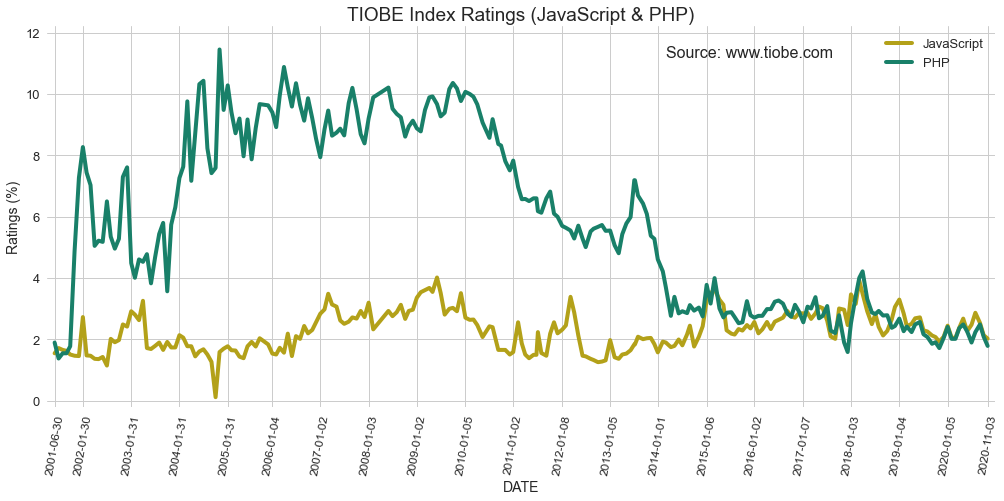

JavaScript --> Lowest rating  0.12% on 2004-10-31   Highest rating  4.02% on 2009-06-04
       PHP --> Lowest rating  1.38% on 2001-07-30   Highest rating 11.45% on 2004-11-30


In [9]:
plt.figure(figsize=(17,7))
plt.axis([pd.Timestamp('2001-05-01'), pd.Timestamp('2020-12-31'), -0.2, 12.2])
plt.plot(tiobe.index, tiobe['JavaScript'], label='JavaScript', color='#b3a119', linewidth=4)
plt.plot(tiobe.index, tiobe['PHP'], label='PHP', color='#198069', linewidth=4)
plt.text(pd.Timestamp('2014-03-06'), 11.2, 'Source: www.tiobe.com', fontsize=16)
plt.title('TIOBE Index Ratings (JavaScript & PHP)', fontsize=19)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('Ratings (%)', fontsize=14)
plt.xticks(tiobe_years_ind, rotation=80, fontsize=12)
plt.yticks(fontsize=13)
plt.grid(color='#cccccc')
plt.legend(fontsize=13)
plt.show()
for lang in ['JavaScript', 'PHP']:
    lang_min = tiobe[tiobe[lang] == min(tiobe[lang])][lang]
    lang_max = tiobe[tiobe[lang] == max(tiobe[lang])][lang]
    print("{:>10} --> Lowest rating {:5}% on {}   Highest rating {:5}% on {}" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

This clearly shows **PHP** by far was one of the most popular programming language, especially in 2000s! It sometimes received ratings of **above 10%**. However, it maintained within **2-4%** in the last 7 years. Besides, it might have the probability to go down further, when the last 2 years were observed carefully!

For **JavaScript**, there were not significant changes in all measurements. It went as high as **4%**, but it roughly remained stationary between **2-3.8%** in recent years.

The next figure involves two other programming languages, **Perl** and **Delphi/Object Pascal**, that are the remaining ones having no missing values:

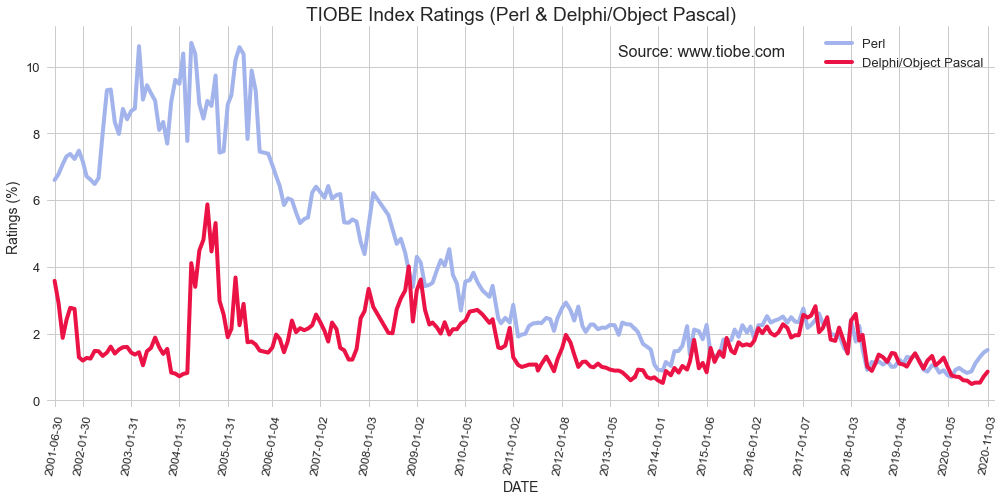

                Perl --> Lowest rating   0.7% on 2020-02-04   Highest rating 10.71% on 2004-04-30
Delphi/Object Pascal --> Lowest rating  0.49% on 2020-07-04   Highest rating  5.87% on 2004-08-30


In [10]:
plt.figure(figsize=(17,7))
plt.axis([pd.Timestamp('2001-05-01'), pd.Timestamp('2020-12-31'), -0.2, 11.2])
plt.plot(tiobe.index, tiobe['Perl'], label='Perl', color='#a2b4eb', linewidth=4)
plt.plot(tiobe.index, tiobe['Delphi/Object Pascal'], label='Delphi/Object Pascal', color='#eb1345', linewidth=4)
plt.text(pd.Timestamp('2013-03-06'), 10.3, 'Source: www.tiobe.com', fontsize=16)
plt.title('TIOBE Index Ratings (Perl & Delphi/Object Pascal)', fontsize=19)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('Ratings (%)', fontsize=14)
plt.xticks(tiobe_years_ind, rotation=80, fontsize=12)
plt.yticks(fontsize=13)
plt.grid(color='#cccccc')
plt.legend(fontsize=13)
plt.show()
for lang in ['Perl', 'Delphi/Object Pascal']:
    lang_min = tiobe[tiobe[lang] == min(tiobe[lang])][lang]
    lang_max = tiobe[tiobe[lang] == max(tiobe[lang])][lang]
    print("{:>20} --> Lowest rating {:5}% on {}   Highest rating {:5}% on {}" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

Similarly, **Perl** has achieved to become one of the most preferred programming language, sometimes getting its rating **above 10%** until the end of 2005. Then, it substantially lost the popularity afterwards, and it continues to have the ratings **below 2%** in recent years!

About **Delphi/Object Pascal**, it also went up to **6%** in 2004; the second peak occurred with **4%** in the last 2008. For the last few years, it had the ratings similar to **Perl** and the language got below the former in 2020.

The next figure involves more programming languages, but with **leading missing values**. That means there exist NaN rating values for these languages, thus they were not measured in the first few years of TIOBE Index. Despite this situation, it does not affect the figure creation at all...

Let's see what we have below:

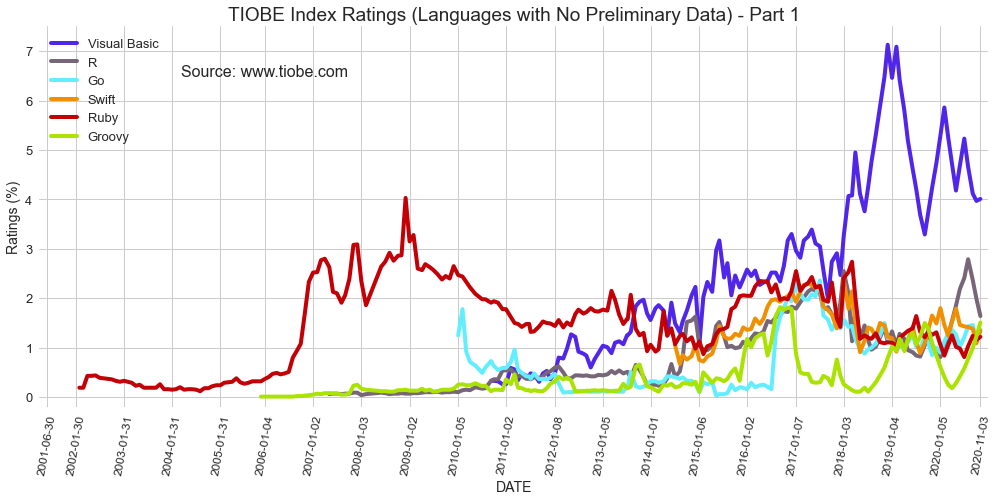

Visual Basic --> Lowest rating  0.26% on 2010-12-07   Highest rating  7.13% on 2018-12-02
           R --> Lowest rating  0.04% on 2008-01-03   Highest rating  2.79% on 2020-08-02
          Go --> Lowest rating  0.03% on 2015-05-13   Highest rating  2.36% on 2017-07-07
       Swift --> Lowest rating  0.67% on 2014-08-11   Highest rating  2.38% on 2018-01-03
        Ruby --> Lowest rating  0.12% on 2004-08-30   Highest rating  4.03% on 2008-12-03
      Groovy --> Lowest rating  0.01% on 2005-12-03   Highest rating  1.82% on 2016-09-08


In [11]:
plt.figure(figsize=(17,7))
plt.axis([pd.Timestamp('2001-05-01'), pd.Timestamp('2020-12-31'), -0.2, 7.5])
plt.plot(tiobe.index, tiobe['Visual Basic'], label='Visual Basic', color='#5026eb', linewidth=4)
plt.plot(tiobe.index, tiobe['R'], label='R', color='#776677', linewidth=4)
plt.plot(tiobe.index, tiobe['Go'], label='Go', color='#63eeff', linewidth=4)
plt.plot(tiobe.index, tiobe['Swift'], label='Swift', color='#f09000', linewidth=4)
plt.plot(tiobe.index, tiobe['Ruby'], label='Ruby', color='#c20006', linewidth=4)
plt.plot(tiobe.index, tiobe['Groovy'], label='Groovy', color='#aae300', linewidth=4)
plt.text(pd.Timestamp('2004-04-06'), 6.5, 'Source: www.tiobe.com', fontsize=16)
plt.title('TIOBE Index Ratings (Languages with No Preliminary Data) - Part 1', fontsize=19)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('Ratings (%)', fontsize=14)
plt.xticks(tiobe_years_ind, rotation=80, fontsize=12)
plt.yticks(fontsize=13)
plt.grid(color='#cccccc')
plt.legend(fontsize=13)
plt.show()
for lang in ['Visual Basic', 'R', 'Go', 'Swift', 'Ruby', 'Groovy']:
    lang_rt = tiobe[~tiobe[lang].isnull()][lang]
    lang_min = lang_rt[lang_rt == min(lang_rt)]
    lang_max = lang_rt[lang_rt == max(lang_rt)]
    print("{:>12} --> Lowest rating {:5}% on {}   Highest rating {:5}% on {}" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

Among these six languages above:

- **Visual Basic** (started in 2010) gained popularity remarkably every year until 2018, reaching higher than **7%**. Then, there are rises and falls in the last two years, staying at around **4%** in the last measurements.
- **Ruby** had the most ratings data, started in the beginning of 2002. It saw its peak in late 2008 with **4%**, then its rating changed continuously between **0.9%** and **2.9%** afterwards.
- When **R** appeared in 2007, it wasn't so popular among the programmers. But, it slowly gained its popularity, thus staying above **1%** most of the time in the last 6 years. Also, it saw its own peak this year with about **2.8%**. 
- **Go** (started in 2010) made a good introduction with above **1%** rating, but then had its rating decreased gradually. In 2017, it reached the peak with **2.3%**. This language's recent rating values wander between **1%** and **1.5%**.
- Apple's programming language **Swift** first appeared in 2014 and has seen the highest rating of **2.4%** in 2018. Currently, it stays within **1%** to **1.4%**.
- **Groovy** (started in 2006) did not gain popularity in the first few years. But, things have changed for the language when it received the highest rating with **1.8%** in 2016. Interestingly, it went down to around **%0.2** this year, then risen up at a very high rate, up to **1.5%..

Now, let's move to the _2nd part_ of programming languages with no preliminary data existed in the index:

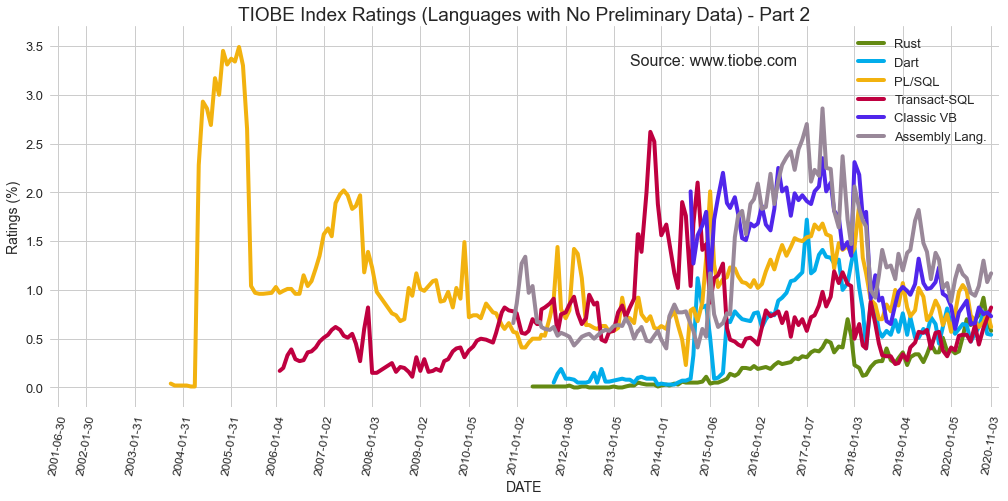

                Rust --> Lowest rating   0.0% on 2012-03-11   Highest rating  0.92% on 2020-09-06
                Dart --> Lowest rating  0.03% on 2013-12-06   Highest rating  1.72% on 2017-01-07
              PL/SQL --> Lowest rating  0.01% on 2004-03-31   Highest rating  3.49% on 2005-03-31
        Transact-SQL --> Lowest rating  0.11% on 2008-11-02   Highest rating  2.62% on 2013-10-10
Classic Visual Basic --> Lowest rating   0.6% on 2020-02-04   Highest rating  2.35% on 2017-05-06
   Assembly Language --> Lowest rating   0.4% on 2014-02-08   Highest rating  2.86% on 2017-05-06


In [12]:
plt.figure(figsize=(17,7))
plt.axis([pd.Timestamp('2001-05-01'), pd.Timestamp('2020-12-31'), -0.2, 3.7])
plt.plot(tiobe.index, tiobe['Rust'], label='Rust', color='#648a13', linewidth=4)
plt.plot(tiobe.index, tiobe['Dart'], label='Dart', color='#02adeb', linewidth=4)
plt.plot(tiobe.index, tiobe['PL/SQL'], label='PL/SQL', color='#f2b20f', linewidth=4)
plt.plot(tiobe.index, tiobe['Transact-SQL'], label='Transact-SQL', color='#bf0040', linewidth=4)
plt.plot(tiobe.index, tiobe['Classic Visual Basic'], label='Classic VB', color='#5026eb', linewidth=4)
plt.plot(tiobe.index, tiobe['Assembly Language'], label='Assembly Lang.', color='#998899', linewidth=4)
plt.text(pd.Timestamp('2013-05-06'), 3.3, 'Source: www.tiobe.com', fontsize=16)
plt.title('TIOBE Index Ratings (Languages with No Preliminary Data) - Part 2', fontsize=19)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('Ratings (%)', fontsize=14)
plt.xticks(tiobe_years_ind, rotation=80, fontsize=12)
plt.yticks(fontsize=13)
plt.grid(color='#cccccc')
plt.legend(fontsize=13)
plt.show()
for lang in ['Rust', 'Dart', 'PL/SQL', 'Transact-SQL', 'Classic Visual Basic', 'Assembly Language']:
    lang_rt = tiobe[~tiobe[lang].isnull()][lang]
    lang_min = lang_rt[lang_rt == min(lang_rt)]
    lang_max = lang_rt[lang_rt == max(lang_rt)]
    print("{:>20} --> Lowest rating {:5}% on {}   Highest rating {:5}% on {}" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

Here is the figure above, implying that:

- **PL/SQL**, first appeared in late 2003, had substantial popularity within the first two years, with the maximum of **3.5%**. Later, its rating was decreased in the oncoming years, generally staying between **0.5%** and **1.5%** up until today.
- **Transact-SQL** (started in 2006) has seen its highest value with **%2.6%** in 2013. The ratings in the last two years constatnly change, staying **below 1%**.
- **Classic Visual Basic** has progressed very well by usually staying above **1.5%** till the 1st quarter of 2018. Now, we see the language somewhere around **0.75%**.
- **Dart** (started in 2011) reached its peak popularity in late 2016 with **1.7%**. Like others, it has lost some ratings later, but manages to stay above **0.5%**.
- **Rust**, another language that made its debut in 2011, has risen up very slowly; but overall, it has _never achieved any ratings_ that passed above **1%**.
- Lastly, **Assembly Language** began with the ratings no lower than **0.4%** in its first years. The language showed itself much better by reaching approx. **2.9%** in 2017. Similar to others, it goes within the range of **0.5%** and **1%** this year.

One more figure to analyze, containing three more prog. languages which have **intermediate missing values** in common! When inspected, **SQL** had a very big gap between 2004 and 2017. In contrast, **MATLAB** and **Objective-C** only had a few ones in 2002. To fill the missing ones properly, **linear interpolation** was applied to each...

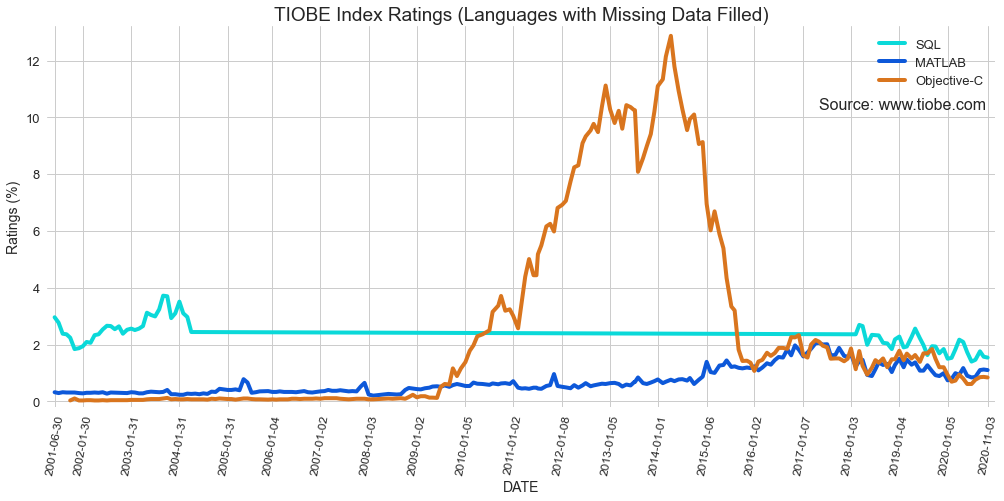

                 SQL --> Lowest rating   1.4% on 2020-07-04   Highest rating  3.72% on 2003-09-30
              MATLAB --> Lowest rating   0.2% on 2008-02-07   Highest rating  2.06% on 2017-05-06
         Objective-C --> Lowest rating  0.03% on 2001-10-26   Highest rating 12.87% on 2014-04-10


In [13]:
tiobe['SQL'] = tiobe['SQL'].interpolate()
tiobe['MATLAB'] = tiobe['MATLAB'].interpolate()
tiobe['Objective-C'] = tiobe['Objective-C'].interpolate()
plt.figure(figsize=(17,7))
plt.axis([pd.Timestamp('2001-05-01'), pd.Timestamp('2020-12-31'), -0.2, 13.2])
plt.plot(tiobe.index, tiobe['SQL'], label='SQL', color='#0bd9d9', linewidth=4)
plt.plot(tiobe.index, tiobe['MATLAB'], label='MATLAB', color='#0d58d9', linewidth=4)
plt.plot(tiobe.index, tiobe['Objective-C'], label='Objective-C', color='#d9751e', linewidth=4)
plt.text(pd.Timestamp('2017-05-06'), 10.3, 'Source: www.tiobe.com', fontsize=16)
plt.title('TIOBE Index Ratings (Languages with Missing Data Filled)', fontsize=19)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('Ratings (%)', fontsize=14)
plt.xticks(tiobe_years_ind, rotation=80, fontsize=12)
plt.yticks(fontsize=13)
plt.grid(color='#cccccc')
plt.legend(fontsize=13)
plt.show()
for lang in ['SQL', 'MATLAB', 'Objective-C']:
    lang_rt = tiobe[~tiobe[lang].isnull()][lang]
    lang_min = lang_rt[lang_rt == min(lang_rt)]
    lang_max = lang_rt[lang_rt == max(lang_rt)]
    print("{:>20} --> Lowest rating {:5}% on {}   Highest rating {:5}% on {}" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

From this figure above, we learned that:
    
**Objective-C** remained at the bottom for nearly 7 years! Then it built up its rating significantly every year until 2015. We've seen the rating going **above 12%**, which looks incredible for a programming language! One of the reasons should be because the applications were written with this language for **iOS**, Apple's mobile operating system for _iPhone_ and _iPad_. And, lots of programmers got heavily interested in making mobile apps and games with ever-growing popularity of such systems. However, things turned reversibly for the language after the peak, as it can be seen in the figure that it quickly lost the popularity in **just two years**, down to **less than 2%** and never caught up the previous days' ratings.

There is not much to say about **MATLAB**, as the language stayed below **1%** for a very long time. Although it became as high as **2%** a few years ago, we see the values going up and down around **1%** again.

The database language **SQL** had the highest rating **nearly 4%** in 2003. To be honest, it is impossible to discuss if it went higher than that value or not in the very long time gap until the beginning of 2018. Perhaps, TIOBE did not take the language into account, but later re-included for measurements. The general trend in the last three years show a small decrease overall, going **under 2%**.

### Counting the Ranks for Each Prog. Language

So, the visualizations above clearly demonstrated _the states of all programming languages_ included in the analysis, both in the past and the present.

As a different and unique aspect, in the next one, I'd like to observe **how each language ranked against each other** by counting their placements within all evaluations made by TIOBE each month.

For this to work, we need to get the ranks of all languages for each specific date (i.e. for each row in the dataset). Plus, my assumptions are the ranking is in **dense** method; values are compared from highest to lowest as intended; and any NaN values are not included.

In [14]:
tiobe_ranks = tiobe.rank(method='dense', ascending=False, axis=1)

Then, it is easy to count the rank values for individual languages. Here, a function needs to be defined to get the work done, thus the count operation is carried out seamlessly. However, I limited this to take only **the top 8 rankings**.

In [15]:
def get_rank_count(x):
    ranks = []
    for i in range(1,9):
        ranks.append(list(x.values).count(i))
    return ranks
tiobe_ranks_count = tiobe_ranks.apply(get_rank_count)

After we obtained the counts for top 8 rankings for all available languages, it is time to prepare the actual table. 

Here, I wanted the ranks to be the columns, labeling them from **1st** to **8th**, while the languages are indexes themselves. Furthermore, it should be convenient to highlight the corresponding cells which mark **the highest count** for each specific rank to determine the dominance of languages in this way.

In [16]:
ranking_labels = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th']
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #90ffa0' if v else '' for v in is_max]
tiobe_ranks_count_list = list(zip(tiobe_ranks_count.index, tiobe_ranks_count))
tiobe_ranks_count_df = pd.DataFrame(dict(tiobe_ranks_count_list)).T
tiobe_ranks_count_df.columns = ranking_labels
tiobe_ranks_count_df.style.apply(highlight_max)

,1st,2nd,3rd,4th,5th,6th,7th,8th
C,56,174,0,0,0,0,0,0
Java,174,55,1,0,0,0,0,0
Python,0,1,22,22,33,40,63,12
C++,0,0,159,71,0,0,0,0
C#,0,0,3,31,83,45,33,12
Visual Basic,0,0,0,0,13,29,10,8
JavaScript,0,0,0,0,0,16,55,56
PHP,0,0,12,60,50,48,24,24
R,0,0,0,0,0,0,0,4
SQL,0,0,0,0,2,26,17,63


_Ah, we finally retrieved the table we expected!_ This explains a lot about the superiority of programing languages compared to others, but let's make explanations that substantially drew our attention:

- **Java** is _the most successful_ programming language according to TIOBE Index ratings! Within all rating measurements since the beginning, it took _the 1st place_ **174** times! That's an incredible number for a language in software development! We wonder whether or not it continues this trend for the years to come.
- **C** is the _2nd best_ programming language, as it _placed 2nd_ **174** times! In addition, the language will continue to stay strong in the future, because as you see in the ranking counts, it never went down to _3rd place or lower_!
- All in all, **only these two** aforementioned languages have reached to the top in all time records!
- **C++** also looked strong as it had the most _3rd_ and _4th_ place counts, which are **159** and **71**, respectively. More interestingly, it never went _higher than 3rd place_ and _lower than 4th place!_ Looks weird, isn't it?
- **Python** have more distributions than other languages in terms of counts of rankings. Although it had the most _7th place_ counts (**63**), it succeded to go higher from time to time, up to _2nd place_ **once**, which happened in _November 2020!_ Can we say that it could be a threat for **Java** and **C** in the future?
- We could make similar implications for **C#** and **PHP**, too. Here, **C#** has been in the _5th place_ most, **83** times; and **PHP** has been in the _6th place_ most, **48** times. Meanwhile, they both reached the _3rd place_ several times.
- The database language **SQL** seemed to score the most _8th place,_ which is **63** times. The best rank was _5th place._
- **JavaScript** never placed in the top 5 through the rankings!
- **Perl** and **Objective-C** both achieved to climb up to _3rd place._ However, considering the figures of the ratings above, they are now far away from the popularities back in the old days.
- Last but not the least, these languages never succeeded to get in the top 8 places: **Go**, **Swift**, **MATLAB**, **Groovy**, **Rust**, **Dart**, **Classic Visual Basic**.

### Predicting the Ratings for the Next Two Years

So far, we've drawn the figures containing the ratings for all available programming languages and counted all the specific rankings for each of them. Now, let's move one step further: _The prediction of ratings within the next two years._

First of all, I decided to take **the last five years** of ratings data which looks appropriate for the predictions. Hence, the dataset has been sliced to include the ratings that begin from _January 2016:_

In [17]:
tiobe_post2016 = tiobe.loc['2016':]

Next, because a _machine learning algorithm_ will be involved to predict someting, some data preparations are needed beforehand. Below, I've gone over **three** steps for this purpose:

- **Generating the dates for the next two years, i.e. the next 24 months:** To do it, the last evaluation date of TIOBE Index is fetched to extract the year and month, separately. Then, a list is created to hold the future months as _timestamps_ up until 24 dates have been generated. By the way, _the first day of the month_ is considered for each.
- **Number of days from the last-5-year dates for ML training:** The dates from the last five years have been converted to the number of days; each includes the gap against the date _January 1st, 1900._ Luckily, the timestamp data type allowed to make subtractions from each other to obtain the timedelta.
- **Number of days from the next-2-year dates for ML prediction:** The future dates created previously will also have their number of days extracted, in the same manner.

In [18]:
last_eval = tiobe_post2016.index[-1]
iter_year, iter_month = last_eval.year, last_eval.month
next_24months = []
for i in range(24):
    if iter_month == 12:   iter_month = 1;  iter_year += 1
    else: iter_month += 1
    next_24months.append(pd.Timestamp(year=iter_year, month=iter_month, day=1))
days_train = []
for ts in tiobe_post2016.index:
    days_train.append((ts - pd.Timestamp('1900-01-01')).days)
days_test = []
for ts in next_24months:
    days_test.append((ts - pd.Timestamp('1900-01-01')).days)

By doing these analyses for the first time and since we're dealing with **continuous values**, a _linear regression_ algorithm could be a good start. Now is the time for prediction!

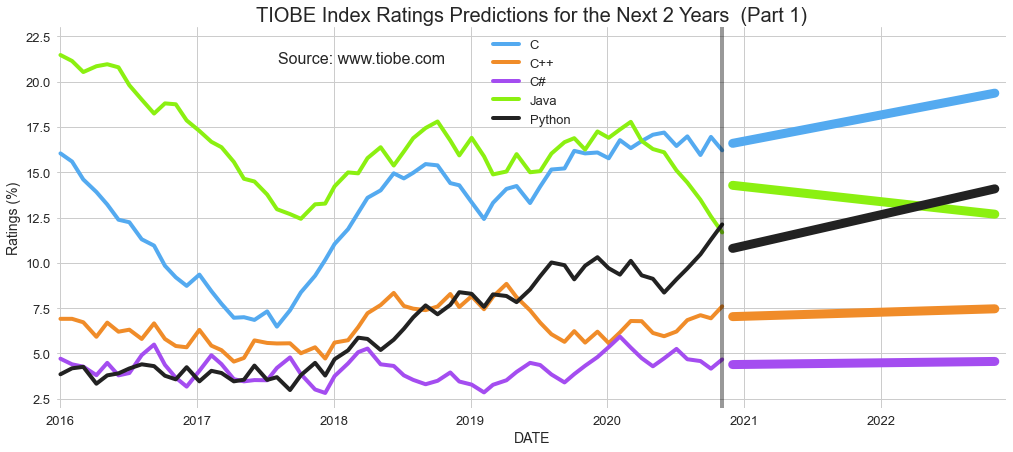

In [19]:
from sklearn.linear_model import LinearRegression
days_train = np.array(days_train).reshape(-1, 1)
days_test = np.array(days_test).reshape(-1, 1)
all_predictions = []
lang_colors = ['#54aaf0', '#f08c29', '#a44df0', '#8bf011', '#222222']
linreg = LinearRegression()
for lang in ['C', 'C++', 'C#', 'Java', 'Python']:
    linreg.fit(days_train, tiobe_post2016[lang].values.reshape(-1, 1))
    all_predictions.append(linreg.predict(days_test))
plt.figure(figsize=(17,7))
plt.axis([pd.Timestamp('2015-12-25'), pd.Timestamp('2022-12-01'), 2.0, 23.0])
plt.plot(tiobe_post2016['C'], label='C', color='#54aaf0', linewidth=4)
plt.plot(tiobe_post2016['C++'], label='C++', color='#f08c29', linewidth=4)
plt.plot(tiobe_post2016['C#'], label='C#', color='#a44df0', linewidth=4)
plt.plot(tiobe_post2016['Java'], label='Java', color='#8bf011', linewidth=4)
plt.plot(tiobe_post2016['Python'], label='Python', color='#222222', linewidth=4)
plt.text(pd.Timestamp('2017-08-06'), 21.0, 'Source: www.tiobe.com', fontsize=16)
for i in range(5):
    plt.plot(next_24months, all_predictions[i], color=lang_colors[i], linewidth=9)
plt.title('TIOBE Index Ratings Predictions for the Next 2 Years  (Part 1)', fontsize=20)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('Ratings (%)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.axvline(tiobe_post2016.index[-1], color='k', linewidth=4, alpha=0.4)
plt.legend(fontsize=13)
plt.grid(color='#cccccc')
plt.show()

_Here, we revealed the popularity of these programming languages for the future!_ From the outcome above, we can imply that the ratings of **C** will gradually increase in the next 2 years, despite being an old language! And still, it will probably stay strong to take the top places every month! Likewise, **Python** will gain popularity, too and, don't be surprised if its rating gets around **15.0%** in 2022!

Other C-family languages, **C++** and **C#** will almost remain the same, but a very minor gain could happen in the oncoming years.

On the other hand, **Java** will lose some ratings; the predictions indicate that it will go down around **12.5%** at the end of 2022. In other words, we might see it taking the _3rd places!_

All right, let's go on predicting the ratings of different programming languages. I've chosen a 2nd group of five other ones: **JavaScript**, **PHP**, **R**, **Go**, **Ruby**.

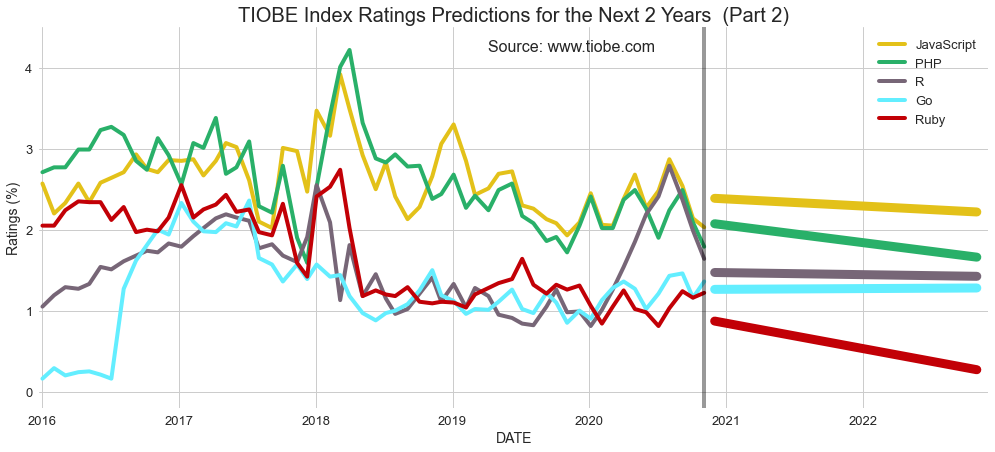

In [20]:
all_predictions = []
lang_colors = ['#e3c119', '#29b069', '#776677', '#63eeff', '#c20006']
for lang in ['JavaScript', 'PHP', 'R', 'Go', 'Ruby']:
    linreg.fit(days_train, tiobe_post2016[lang].values.reshape(-1, 1))
    all_predictions.append(linreg.predict(days_test))
plt.figure(figsize=(17,7))
plt.axis([pd.Timestamp('2015-12-25'), pd.Timestamp('2022-12-01'), -0.2, 4.5])
plt.plot(tiobe_post2016['JavaScript'], label='JavaScript', color='#e3c119', linewidth=4)
plt.plot(tiobe_post2016['PHP'], label='PHP', color='#29b069', linewidth=4)
plt.plot(tiobe_post2016['R'], label='R', color='#776677', linewidth=4)
plt.plot(tiobe_post2016['Go'], label='Go', color='#63eeff', linewidth=4)
plt.plot(tiobe_post2016['Ruby'], label='Ruby', color='#c20006', linewidth=4)
plt.text(pd.Timestamp('2019-04-06'), 4.2, 'Source: www.tiobe.com', fontsize=16)
for i in range(5):
    plt.plot(next_24months, all_predictions[i], color=lang_colors[i], linewidth=9)
plt.title('TIOBE Index Ratings Predictions for the Next 2 Years  (Part 2)', fontsize=20)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('Ratings (%)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.axvline(tiobe_post2016.index[-1], color='k', linewidth=4, alpha=0.4)
plt.legend(fontsize=13)
plt.grid(color='#cccccc')
plt.show()

Consequently, **three** of the five programming languages involved in the figure above will lose popularity. Among all of them, **Ruby** will be affected the most, whose rating might go under **0.5%** within the next 2 years. Meanwhile, the affect will be minor for web programming languages, **JavaScript** and **PHP**. Moreover, the ratings of **R** and **Go** seem to remain stationary.

**A quick update for the predictions above in the upcoming months:**

- _Confidence intervals_ will be implemented to better visualize the probabilities of ratings.
- More complex _machine learning regression_ algorithms will be applied for the attempt to make more accurate predictions.

### **Well, that's it for the analyses of TIOBE Index Ratings of many programming languages. My plan is to continue these analyses in a monthly basis.**

## **See you in the next update and thank you very much for reading!**